<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Nov4/gato_no_gato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [5]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/UGTO/DCI-data/CATS_DOGS/*')

In [11]:
len(files)

1787

# Conjunto de datos de prueba

In [12]:
#numero de pixeles para nuestras imágenes.
num_px=64

In [13]:
train_x=[]
train_y=[]
i,j=0,0
for file in files[:]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<50:
        train_y.append(1)
        i +=1
        train_x.append(data)
        img.close()
    if 'cat' in file and j<50:
        train_y.append(0)
        j +=1
        train_x.append(data)
        img.close()
    if i==50 and j==50:
        print(f'50/50:{i}/{j}')
        break
        img.close()
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

50/50:50/50


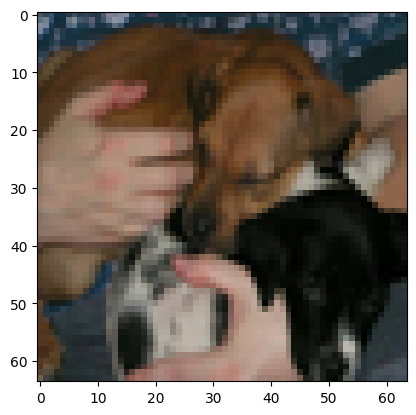

In [14]:
plt.imshow(train_x[50])

In [15]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
len(train_y)

100

#Preparamos la base

In [18]:
test_x=[]
test_y=[]
i,j=0,0
for file in files[:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<99:
        i += 1
        if i>49:
          test_y.append(1)
          test_x.append(data)
          #print(i)
        img.close()
    if 'cat' in file and j<99:
        j += 1
        if j>49:
          test_y.append(0)
          test_x.append(data)
        img.close()
    if i==100 and j==100:
        print(f'50/50:{i}/{j}')
        break
        img.close
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

In [19]:
len(test_x)

100

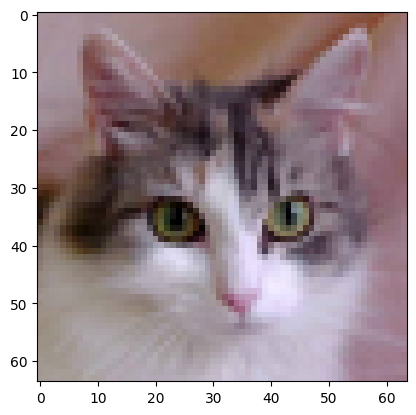

In [20]:
plt.imshow(test_x[0])

In [21]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [22]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [23]:
train_x_flatten.shape

(12288, 100)

# Funciones

In [52]:
y_=sigma(train_set_x,w,b,z)
m=train_set_y.shape[1]
j=np.sum(train_set_y*np.log(y_)+(1-train_set_y)*np.log(1-y_))

In [49]:
J=J(train_set_x,train_set_y,w,b,z,sigma)

In [47]:
train_set_y.shape[1]

100

In [58]:
w-train_set_x@(y_-train_set_y)

array([[-24.16862745, -24.16862745, -24.16862745, ...,  24.16862745,
         24.16862745,  24.16862745],
       [-23.1372549 , -23.1372549 , -23.1372549 , ...,  23.1372549 ,
         23.1372549 ,  23.1372549 ],
       [-21.55490196, -21.55490196, -21.55490196, ...,  21.55490196,
         21.55490196,  21.55490196],
       ...,
       [-24.90980392, -24.90980392, -24.90980392, ...,  24.90980392,
         24.90980392,  24.90980392],
       [-23.90588235, -23.90588235, -23.90588235, ...,  23.90588235,
         23.90588235,  23.90588235],
       [-23.09019608, -23.09019608, -23.09019608, ...,  23.09019608,
         23.09019608,  23.09019608]])

In [70]:
print(b-alpha*db(train_set_x,train_set_y,w,b,z,sigma))

[[-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]
 ...
 [-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ...  0.0001  0.0001  0.0001]]


$$z= \omega^T x+b$$

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [48]:
#funcion Z
def z(x,w,b):
  return w.T @ x + b
#funcion sigma
def sigma(x,w,b,z):
  return (1/(1+np.exp(-z(x,w,b))))
#funcion costo
def J(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  j=np.sum(y*np.log(y_)+(1-y)*np.log(1-y_))
  return -j/m


$\omega = \omega -\alpha\frac{dJ}{d\omega}=\omega -\alpha d\omega$

$b = b -\alpha\frac{dJ}{db}=b -\alpha db$

  * $d\omega=\frac{1}{m} x dz$
  * $db=\frac{1}{m}dz$
  * $dz= a-y$

In [63]:
#derivada
def dw(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  return (1/m)*x@(y_-y)

def db(x,y,w,b,z,sigma):
  y_=sigma(x,w,b,z)
  m=y.shape[1]
  return (1/m)*(y_-y)

def Grad_desc(x,y,w,b,iter=1000,alpha=0.01,z,sigma):
  for i in range(iter):
    #costo
    j=J(x,y,w,b,z,sigma)
    #pesos
    w_0=w-alpha*dw(x,y,w,b,z,sigma)
    b_0=w-alpha*dw(x,y,w,b,z,sigma)
    if
  return w



In [69]:
#parametros iniciales
w=np.zeros(train_x_flatten.shape)
b=0.
# Parametro de aprendizaje
alpha= 0.02


In [ ]:
def propagate()

In [ ]:
train_x_flatten.shape[1]

100

In [ ]:
1/(1+np.exp(-w.T @ train_x_flatten))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])